<a href="https://colab.research.google.com/github/MashaKubyshina/Learning_to_code/blob/master/Classification_Model_Training_Job_Postings_(PART_1_EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
# The EDA is done following this path https://towardsdatascience.com/text-classification-in-python-dd95d264c802
# To install it, please type this command in the shell(terminal): ! conda install -c conda-forge altair vega_datasets notebook vega

**Classification Model Training**

**Goal: with a supervised machine learning classification model predict the category of a job posting.**

For this project we are going to use the the dataset from data.world https://data.world/jobspikr/10000-data-scientist-job-postings-from-the-usa

The dataset has 10000 entries with information from data scientist job postings from the usa.

The project is focusing on **text classification problem**. 

The project will be broken in a few parts. Each part done in a separate notebook and can be used independently.


1.   Define the problem
2.   Find and input the data 
3.   Perform EDA and text preprocessing
4.   Feature Engineering
5.   Predictive Models
6.   Conclusion



Since this is a school project, I have relied heavily on this tutorial for the EDA part https://towardsdatascience.com/text-classification-in-python-dd95d264c802 and would like to give full credit to Miguel Fernandez Zafra for creating this resource.

All the code can be found in my github https://github.com/MashaKubyshina/Learning_to_code


**Problem Defenition**

The long-term goal is to be able to categorize unlabled dataset. For that we first need to train our model on a smiliar labled data set.

In this project we will use a labeled dataset so that algorithms can learn the correlations and patterns in the data.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
sns.set_style("whitegrid")
import altair as alt
#alt.renderers.enable("notebook")

# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

In [72]:
# Exploratory Data Analysis on the dataset

# For further information please visit the project site: https://altair-viz.github.io/

In [73]:
# Open the dataset from https://data.world/jobspikr/10000-data-scientist-job-postings-from-the-usa
# This dataset has 10000 entries of job postings in data science; the two columns we are particulary interested in are:
# category and job_description

import pandas as pd
df = pd.read_csv('https://query.data.world/s/hpv4ejstsxjszdo2eathrfgjhzqlqy')
df.head(10)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,Usa,2019-02-05,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,Usa,2019-02-05,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,Usa,2019-02-06,Job Title: - Sr. Data Science Consultant Durat...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,Usa,2019-02-05,• 3+ years related a professional experience ...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN


In [74]:
df.shape

(10000, 22)

In [75]:
# Create a slice with the columns to look at

df_slice=df[['job_title', 'category', 'company_name',
       'city', 'state', 'country', 'inferred_city', 'inferred_state',
       'inferred_country', 'post_date', 'job_description', 'job_type']]

df_slice.shape

(10000, 12)

In [76]:
# Drop the columns with nan values

df_full = df_slice.dropna(how='any',axis=0)
df_full.shape

(8048, 12)

In [77]:
# create new column with just the first name of the category name

df_full['cat']=df_full['category'].str.split().str[0]

df_full['cat'] = df_full['cat'].apply(lambda x: ' '.join(sorted(x.split())))
df_full['cat'].unique()

array(['Accounting/Finance', 'biotech', 'Computer/Internet',
       'Arts/Entertainment/Publishing', 'military', 'business',
       'Engineering/Architecture', 'Manufacturing/Mechanical', 'life',
       'Banking/Loans', 'agriculture', 'Education/Training', 'science',
       'arts', 'Customer+Service', 'food', 'technology', 'Healthcare',
       'Government/Military', 'architecture', 'community', 'production',
       'r', 'Insurance', 'security', 'healthcare', 'Human+Resources',
       'Administrative', 'language', 'media', 'Sales', 'advertising',
       'office', 'Restaurant/Food+Service', 'Telecommunications',
       'Construction/Facilities', 'Legal', 'Marketing/Advertising/PR',
       'Non-Profit/Volunteering', 'Pharmaceutical/Bio-tech', 'education',
       'management', 'transportation', 'protective', 'legal', 'sales',
       'Retail', 'Hospitality/Travel', 'building',
       'Transportation/Logistics', 'math', 'Engineering-or-architecture',
       'Computer-or-internet', 'Manufactu

In [78]:
# Consolidating category names is a very important step in our anlaysis


df_full['cat']= df_full['cat'].replace(['Accounting/Finance','Accounting-or-finance','finance','financieel','Banking','Banking/Loans','Banking-or-loans'],'Finance')
df_full['cat']= df_full['cat'].replace(['biotech','Pharmaceutical/Bio-tech','science','math'],'Biotech')
df_full['cat']= df_full['cat'].replace(['Computer/Internet','technology','Computer-or-internet','computer'],'Computer/Tech')
df_full['cat']= df_full['cat'].replace(['life','social','r','animal','higher','personal'],'Misc')
df_full['cat']= df_full['cat'].replace(['Arts/Entertainment/Publishing','Arts-or-entertainment-or-publishing','entertainment','Entertainment','production','media','community','advertising','Marketing/Advertising/PR','Sales','sales','Marketing-or-advertising-or-pr','SocialMedia/Marketing'],'Marketing/Ads/Entertainment')
df_full['cat']= df_full['cat'].replace(['military','Government/Military','science','Government-or-military'],'Military')
df_full['cat']= df_full['cat'].replace(['business','management','Upper-Management-or-consulting'],'Business/Consulting')
df_full['cat']= df_full['cat'].replace(['Administrative','office','administrative','Human+Resources','Human-Resources','Customer+Service','Telecommunications','service','Customer-Service','CustomerService'],'Administrative/HR')
df_full['cat']= df_full['cat'].replace(['Engineering/Architecture','architecture','Engineering-or-architecture','engineering'],'Engineering/Architecture')
df_full['cat']= df_full['cat'].replace(['Manufacturing/Mechanical','production','manufacturing','Manufacturing-or-mechanical'],'Manufacturing')
df_full['cat']= df_full['cat'].replace(['agriculture',],'Agriculture')
df_full['cat']= df_full['cat'].replace(['Restaurant/Food+Service','food','Restaurant-or-food-Service'],'FoodService')
df_full['cat']= df_full['cat'].replace(['Education/Training','education','Education-or-training'],'Education/Training')
df_full['cat']= df_full['cat'].replace(['science','math'],'Math/Science')
df_full['cat']= df_full['cat'].replace(['Healthcare','healthcare'],'Healthcare')
df_full['cat']= df_full['cat'].replace(['Insurance','protective'],'Insurance')
df_full['cat']= df_full['cat'].replace(['security','Law-Enforcement-or-security'],'Security')
df_full['cat']= df_full['cat'].replace(['language','arts','Arts'],'Language/Arts')
df_full['cat']= df_full['cat'].replace(['Construction/Facilities','building','Construction-or-facilities','construction'],'Construction')
df_full['cat']= df_full['cat'].replace(['Legal','legal'],'Legal')
df_full['cat']= df_full['cat'].replace(['transportation','Transportation/Logistics','Transportation-or-logistics'],'Transportation')
df_full['cat']= df_full['cat'].replace(['Hospitality-or-travel','Hospitality/Travel'],'Hospitality/Travel')

In [79]:
df_full['cat'].unique()

array(['Finance', 'Biotech', 'Computer/Tech',
       'Marketing/Ads/Entertainment', 'Military', 'Business/Consulting',
       'Engineering/Architecture', 'Manufacturing', 'Misc', 'Agriculture',
       'Education/Training', 'Language/Arts', 'Administrative/HR',
       'FoodService', 'Healthcare', 'Insurance', 'Security',
       'Construction', 'Legal', 'Non-Profit/Volunteering',
       'Transportation', 'Retail', 'Hospitality/Travel', 'banking',
       'Pharmaceutical/bio-tech', 'Non-profit/volunteering',
       'communications', 'Admin', 'executive', 'Data', 'Senior', 'TV',
       'Principal', 'Vice', 'Sr.', 'Applied', 'Digital', 'DISTINGUISHED',
       'Manager,', 'Lead', 'Quality', 'Mid', 'Sr', 'Agile', 'Intel',
       'Staff', 'Clinical', 'Customer', 'Systems,', 'Geospatial',
       'Mgr/Sr', 'Deep', 'Marketing', 'Optimization', 'AI', 'Research',
       'Revenue', 'Associate', 'Full-time', 'Actuarial', 'Homeland',
       'Distinguished', 'Director', 'Federal', 'Junior', 'Operational

In [80]:
# For visualizaiton make a slice of 1000 rows (the visualizaiton tool will work with up to 5000 rows only)

data=df_full.iloc[:1000]
data

,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,cat
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,Biotech
5,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined,Finance
6,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464,AWS Data Scientist,architecture and engineering,Jefferson Frank,Long Beach,CA,Usa,Long beach,California,Usa,2019-04-02,"AWS Data Scientist - Santa Monica, CA - $160k ...",Full Time,Engineering/Architecture
1465,Data Scientist - AWS/Spark/Scala Required,architecture and engineering,Jefferson Frank,Washington,DC,Usa,Washington,Washington d.c.,Usa,2019-04-02,Big Data Software Engineer - D.C. Area Descrip...,Full Time,Engineering/Architecture
1466,Data Scientist,Accounting/Finance,"CICONIX, LLC",Falls Church,VA,Usa,Falls church,Virginia,Usa,2019-04-03,Responsibilities and Duties\n\nModeling comple...,Undefined,Finance
1467,Data Scientist,Accounting/Finance,"CICONIX, LLC",Washington,DC,Usa,Washington,Washington d.c.,Usa,2019-04-03,Responsibilities and Duties\n\nModeling comple...,Undefined,Finance


In [ ]:
# Let's plot number of articles in each category

bars = alt.Chart(data).mark_bar(size=50).encode(
    x=alt.X("cat"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of Job Postings')),
    tooltip=[alt.Tooltip('count()', title='Job Category'), 'cat'],
    color='cat'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of jobs in each category",
)

# We can see that the classes are unbalanced
# This will create a problem in classification, the classifier will output to these categories and "look" accurate

In [ ]:
# Percent of jobs in each category

data['id'] = 1
data2 = pd.DataFrame(data.groupby('cat').count()['id']).reset_index()

bars = alt.Chart(data2).mark_bar(size=50).encode(
    x=alt.X('cat'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Jobs')),
    color='cat'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of jobs in each category",
)

# looking at % proves that the classes in the dataset are unbalanced.
# for our project we cna either look only at certian classes or try to combine some of the classes together

In [83]:
# Job posts lenght by category

data['Job_post_length'] = data['job_description'].str.len()

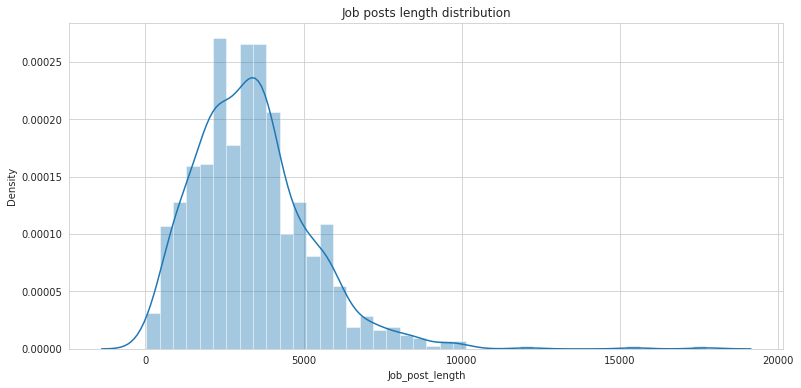

In [84]:
plt.figure(figsize=(12.8,6))
sns.distplot(data['Job_post_length']).set_title('Job posts length distribution');

In [85]:
data['Job_post_length'].describe()

count     1000.000000
mean      3377.406000
std       1866.547149
min         24.000000
25%       2151.750000
50%       3192.500000
75%       4261.750000
max      17730.000000
Name: Job_post_length, dtype: float64

In [86]:
# Removing 95% percentile to aprpeciate the distribution bettwe

quantile_95 = data['Job_post_length'].quantile(0.95)
data_95 = data[data['Job_post_length'] < quantile_95]

In [ ]:
plt.figure(figsize=(12.8,6))
sns.distplot(data_95['Job_post_length']).set_title('Job posts length distribution');

In [88]:
data_more10k = data[data['Job_post_length'] > 10000]
len(data_more10k)

4

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data, x='cat', y='Job_post_length', width=.5);

In [ ]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=data_95, x='cat', y='Job_post_length');

In [91]:
with open('Jobs_dataset.pickle', 'wb') as output:
    pickle.dump(data, output)

Since classes are unbalanced I will create a subset with just 3 classes: Computer/Tech, Engineering/Architecture, Business/Consulting.

There thress classes are more balanced and we can use them for the project.


In [92]:
data_classes=df_full[(df_full.cat == 'Computer/Tech') | (df_full.cat == 'Engineering/Architecture') | (df_full.cat == 'Business/Consulting')]
data_classes.head(10)

,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,cat
10,Data Scientist,Computer/Internet,Northrop Grumman,Monterey,CA 93940,Usa,Monterey,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
12,ETL Developer / Data Scientist,Computer/Internet,Noblis,Reston,VA 20191,Usa,Reston,Virginia,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
13,Research Data Scientist,Computer/Internet,ARUP Laboratories,Salt Lake City,UT,Usa,Salt lake city,Utah,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
18,Data Scientist,Computer/Internet,Bank of America,Seattle,WA 98104 (First Hill area),Usa,Seattle,Washington,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
19,Data Scientist,Computer/Internet,Sallie Mae,Newark,DE,Usa,Newark,Delaware,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
21,Data Scientist,Computer/Internet,VideoAmp,Santa Monica,CA,Usa,Santa monica,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
22,Data Scientist,Computer/Internet,Apple,Cambridge,MA,Usa,Cambridge,Massachusetts,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
32,Data Scientist,business and financial operations,Apex Systems,West Chester Township,OH,Usa,West chester,Ohio,Usa,2019-02-05,Description Building large systematic reports ...,Full Time,Business/Consulting
33,"Senior Data Scientist - Tallahassee, FL - $150...",business and financial operations,Jefferson Frank,Tallahassee,FL,Usa,Tallahassee,Florida,Usa,2019-02-05,My client is a leader in the Manufacturing ver...,Full Time,Business/Consulting
34,Data Scientist,business and financial operations,"5 Star Global Recruitment Partners, LLC",Dallas,TX,Usa,Dallas,Texas,Usa,2019-02-05,"Data Scientist Client: A Fortune 500, very lar...",Full Time,Business/Consulting


In [93]:
data_classes.shape

(4300, 13)

In [94]:
# For visualizaiton make a slice of 1000 rows 

data_subset=data_classes.iloc[:1000]
data_subset

,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,cat
10,Data Scientist,Computer/Internet,Northrop Grumman,Monterey,CA 93940,Usa,Monterey,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
12,ETL Developer / Data Scientist,Computer/Internet,Noblis,Reston,VA 20191,Usa,Reston,Virginia,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
13,Research Data Scientist,Computer/Internet,ARUP Laboratories,Salt Lake City,UT,Usa,Salt lake city,Utah,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
18,Data Scientist,Computer/Internet,Bank of America,Seattle,WA 98104 (First Hill area),Usa,Seattle,Washington,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
19,Data Scientist,Computer/Internet,Sallie Mae,Newark,DE,Usa,Newark,Delaware,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,Associate Data Scientist,business and financial operations,HomeAdvisor,Denver,CO,Usa,Denver,Colorado,Usa,2019-05-04,"HomeAdvisor and our sister company, Angie’s Li...",Full Time,Business/Consulting
2369,Data Scientist,business and financial operations,IQVIA,Plymouth Meeting,PA,Usa,Plymouth meeting,Pennsylvania,Usa,2019-05-03,Join us on our exciting journey! IQVIA™ is The...,Full Time,Business/Consulting
2370,Data Scientist,business and financial operations,Robert Half Technology,Irvine,CA,Usa,Irvine,California,Usa,2019-05-04,Ref ID: 00350-9501931111 Classification: Accou...,Full Time,Business/Consulting
2371,Data Scientist/Modeler,business and financial operations,Capgemini Government Solutions,Washington,DC,Usa,Washington,Washington d.c.,Usa,2019-05-04,Capgemini Government Solutions (CGGS) LLC is s...,Full Time,Business/Consulting


In [ ]:
# Let's plot number of articles in each category

bars = alt.Chart(data_subset).mark_bar(size=50).encode(
    x=alt.X("cat"),
    y=alt.Y("count():Q", axis=alt.Axis(title='Number of Job Postings')),
    tooltip=[alt.Tooltip('count()', title='Job Category'), 'cat'],
    color='cat'

)

text = bars.mark_text(
    align='center',
    baseline='bottom',
).encode(
    text='count()'
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "Number of jobs in each category",
)

In [ ]:
# Percent of jobs in each category

data_subset['id'] = 1
data_subset_2 = pd.DataFrame(data_subset.groupby('cat').count()['id']).reset_index()

bars = alt.Chart(data_subset_2).mark_bar(size=50).encode(
    x=alt.X('cat'),
    y=alt.Y('PercentOfTotal:Q', axis=alt.Axis(format='.0%', title='% of Jobs')),
    color='cat'
).transform_window(
    TotalArticles='sum(id)',
    frame=[None, None]
).transform_calculate(
    PercentOfTotal="datum.id / datum.TotalArticles"
)

text = bars.mark_text(
    align='center',
    baseline='bottom',
    #dx=5  # Nudges text to right so it doesn't appear on top of the bar
).encode(
    text=alt.Text('PercentOfTotal:Q', format='.1%')
)

(bars + text).interactive().properties(
    height=300, 
    width=700,
    title = "% of jobs in each category",
)

# Here we have a subset of the dataset containing X entries with jobs labeled as one of these 3 categories
# The classes are balanced in this dataset

**Text Preprocessing**

In [97]:
# Text pre-processing
# Removes punctuation, stopwords, and returns a list of the remaining words, or tokens
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [68]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

#testing the function with a sample text#
# sample_text = "Hey There! This is a Sample review, which 123happens {blah}%456 to contain happened punctuations universal rights of right contained."
# print(text_process(sample_text))
jobs_text=text_process(data['job_description'])
print(text_process(data['job_description']))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [69]:
data['jobs_cleaned'] = data['job_description'].apply(lambda x: text_process(x))
data.head(10)

,job_title,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,post_date,job_description,job_type,cat,id,Job_post_length,jobs_cleaned
0,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance,1,2762,"[read, people, saying, working, we, farmer, jo..."
3,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance,1,3663,"[read, people, saying, working, about, blackro..."
4,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,Usa,2019-02-05,We are seeking an extraordinary Data Scientist...,Full Time,Biotech,1,3840,"[we, seeking, extraordinary, data, scientist, ..."
5,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,Usa,2019-02-05,Read what people are saying about working here...,Undefined,Finance,1,4043,"[read, people, saying, working, opportunity, t..."
6,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance,1,2996,"[read, people, saying, working, at, spotify, m..."
8,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Finance,1,3688,"[read, people, saying, working, about, blackro..."
10,Data Scientist,Computer/Internet,Northrop Grumman,Monterey,CA 93940,Usa,Monterey,California,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech,1,3455,"[read, people, saying, working, at, northrop, ..."
12,ETL Developer / Data Scientist,Computer/Internet,Noblis,Reston,VA 20191,Usa,Reston,Virginia,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech,1,3958,"[read, people, saying, working, responsibility..."
13,Research Data Scientist,Computer/Internet,ARUP Laboratories,Salt Lake City,UT,Usa,Salt lake city,Utah,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech,1,4285,"[read, people, saying, working, job, detail, d..."
18,Data Scientist,Computer/Internet,Bank of America,Seattle,WA 98104 (First Hill area),Usa,Seattle,Washington,Usa,2019-02-06,Read what people are saying about working here...,Undefined,Computer/Tech,1,668,"[read, people, saying, working, job, descripti..."


**Next step: Feature Engineering**

Feature engineering is the process of transforming data into features to act as inputs for machine learning models such that good quality features help in improving the model performance.

Go to next colab